In [1]:
import findspark
findspark.init('/home/rachneet/spark-3.0.1-bin-hadoop2.7')

In [2]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [3]:
sc = SparkContext()

In [4]:
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [5]:
socket_stream = ssc.socketTextStream("127.0.0.1", 9999)

In [6]:
lines = socket_stream.window(20)

In [7]:
from collections import namedtuple
fields = ('tag', 'count')
Tweet = namedtuple('Tweet', fields)

In [8]:
(lines.flatMap(lambda text: text.split(" "))
.filter(lambda word: word.lower().startswith("#"))
.map(lambda word: (word.lower(),1))
.reduceByKey(lambda a, b: a+b)
.map(lambda rec: Tweet(rec[0], rec[1]))
.foreachRDD(lambda rdd: rdd.toDF().sort(desc("count"))
.limit(10).registerTempTable("tweets")))

In [9]:
ssc.start()

/home/rachneet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/rachneet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/rachneet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/rachneet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/rachneet/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/rachneet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc 

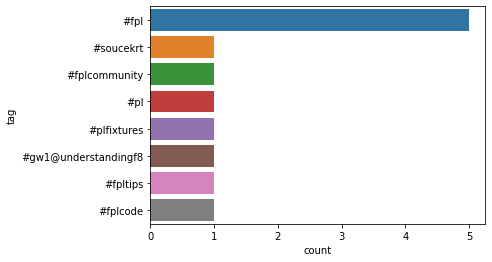

In [ ]:
count = 0
while count<100:
    
    time.sleep(3)
    top_10_tweets = sqlContext.sql('Select tag, count from tweets')
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
#     sns.plt.figure(figsize=(10,8))
    sns.barplot(x ="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()